## Black Spruce: Case Study
The black spruce is a coniferous is a tree found across Canada and the northeastern United States which grows on wet organic soils. The tree is known to be slow growing and have thin straight tree trunks. https://en.wikipedia.org/wiki/Picea_mariana

In [18]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Settings
plt.style.use("ggplot")

#### Read Data
The black spruce data is from the GitHub repo (https://github.com/lchihara/MathStatsResamplingR) from the book *Mathematical Statisticsc with Resampling and R* (Chihara, Hesterberg).

The dataset contains data from a 1990s study of scientists interested in understanding the factors affecting the tree's growth. 72 black spruce seedlings were planted across four plots of land in varying conditions. The tree's attributes were measured over the course of 5 years. The dataset contains information about the plot it was planted in, and its height and diameter at the time of plating and at the 5 year mark.

In [19]:
black_spruce = pd.read_csv("../Data/Spruce.csv")

#### Tree Heights
The section below investigates the numerical summaries and distribution of the tree heights.

In [20]:
height_change = black_spruce["Ht.change"]

print(height_change.describe())

count    72.000000
mean     30.933333
std      11.049428
min       8.300000
25%      23.200000
50%      30.100000
75%      38.175000
max      51.500000
Name: Ht.change, dtype: float64


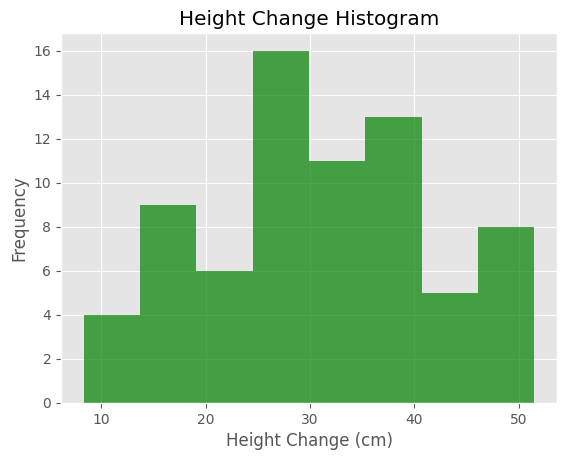

In [21]:
plt.hist(black_spruce["Ht.change"], bins=8, color="green", alpha=0.70)
plt.title("Height Change Histogram")
plt.xlabel("Height Change (cm)")
plt.ylabel("Frequency")
plt.show()

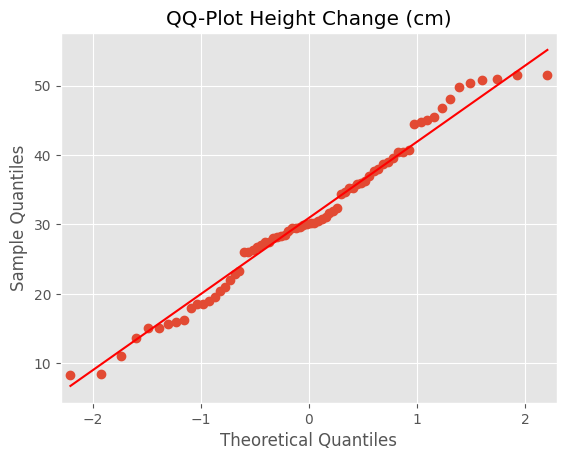

In [22]:
sm.qqplot(black_spruce["Ht.change"], line="s")
plt.title("QQ-Plot Height Change (cm)")
plt.show()

As shown in the qq-plot, the distribution of the height changes (cm) of the black spruce trees appears to be approximately normally distributed. 

#### Tree Diameters
The next section focuses on the tree diameter measurements.

Median Fertilized Diameter Change(cm):     4.7625
Median Non-Fertilized Diameter Change(cm): 2.71171875


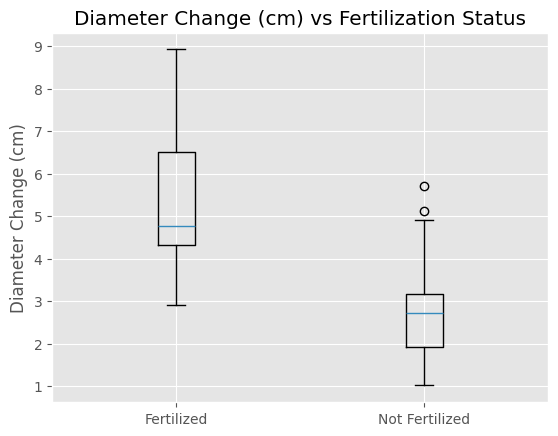

In [ ]:
diameter_fertilized = black_spruce.loc[
    black_spruce["Fertilizer"] == "F", "Di.change"
]
diameter_nonfertilized = black_spruce.loc[
    black_spruce["Fertilizer"] == "NF", "Di.change"
]

print(f"Median Fertilized Diameter Change(cm):     {diameter_fertilized.median()}cm")
print(f"Median Non-Fertilized Diameter Change(cm): {diameter_nonfertilized.median()}cm")

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(
    [diameter_fertilized, diameter_nonfertilized]
)

ax.set_title("Diameter Change (cm) vs Fertilization Status")
ax.set_xticklabels(["Fertilized", "Not Fertilized"])
ax.set_ylabel("Diameter Change (cm)")
plt.show()

The boxplot shows there is a clear relationship between the fertilization of the tree and its diameter change. Black spruce trees that were fertilized have a higher diameter rate of change than trees that were not fertilized. The median diameter rate of change for fertilized trees is 4.76cm, whereas the black spruce trees that were not fertilized had a diameter rate of change of 2.71cm. Interestingly, the spread of the diameter changes was greater for the fertilized trees compared to the non-fertilized trees.

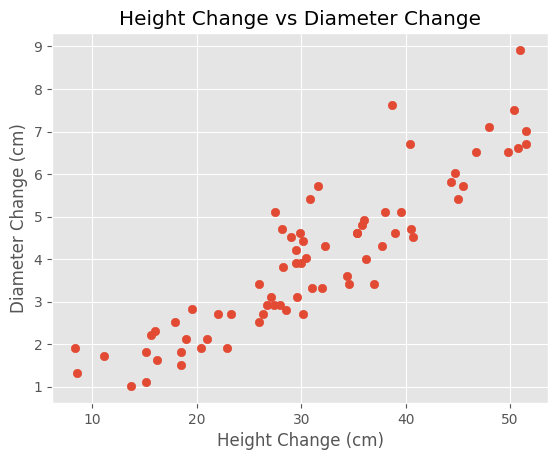

In [27]:
plt.scatter(black_spruce["Ht.change"], black_spruce["Di.change"])
plt.title("Height Change vs Diameter Change")
plt.xlabel("Height Change (cm)")
plt.ylabel("Diameter Change (cm)")
plt.show()

The scatter plot between the height change and diameter change of the tree shows a clear positive relationship. This makes intuitive sense, as the tree grows taller, it needs a wider diameter to support its weight.